In [1]:
### IMPORTS ###

# Quantum libraries:
import pennylane as qml
#from pennylane 
import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

# Plotting
from matplotlib import pyplot as plt
import plotly

# Other
import sys, os
import time
import copy
import tqdm
import joblib # Writing and loading
from noisyopt import minimizeSPSA
import optuna # Automatic tuning tool
import multiprocessing

import warnings
warnings.filterwarnings("ignore", message="For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires.Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.")
##############


In [2]:
# My functions:
sys.path.insert(0, '../')
import vqe_functions as vqe
import qcnn_functions as qcnn


In [3]:
N = 8
J = 1
device = qml.device("default.qubit.jax", wires = N, shots = None)

In [4]:
# Load data and separate in training and test set
data = joblib.load('./vqe_states_job/0noiseN'+str(N)+'.job')

train_index = np.sort(np.concatenate((np.random.choice(np.arange(int(0.2*len(data))), 15, replace = False), np.random.choice(np.arange(int(0.8*len(data)),len(data)), 15, replace = False)  )))

X_train, Y_train = [], []
X_test, Y_test   = [], []
X, Y             = [], []
for i in range(len(data)): 
    if i in train_index:
        X_train.append(data[i][0])
        Y_train.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])
    else:
        X_test.append(data[i][0])
        Y_test.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])
        
X_train, Y_train = jnp.array(X_train), jnp.array(Y_train)
X_test, Y_test   = jnp.array(X_test), jnp.array(Y_test)
X, Y             = jnp.array(X), jnp.array(Y)

print('CLEAN DATA:')
print('______________________________')
print('Size of Data Set: {0}'.format(len(data)))
print('Size of Training Set: {0}'.format(np.shape(X_train)[0]))
print('Size of Test Set    : {0}'.format(np.shape(X_test)[0]))

CLEAN DATA:
______________________________
Size of Data Set: 100
Size of Training Set: 30
Size of Test Set    : 70


+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 50000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.06936857849359512: 100%|█████████| 50000/50000 [02:14<00:00, 371.25it/s]


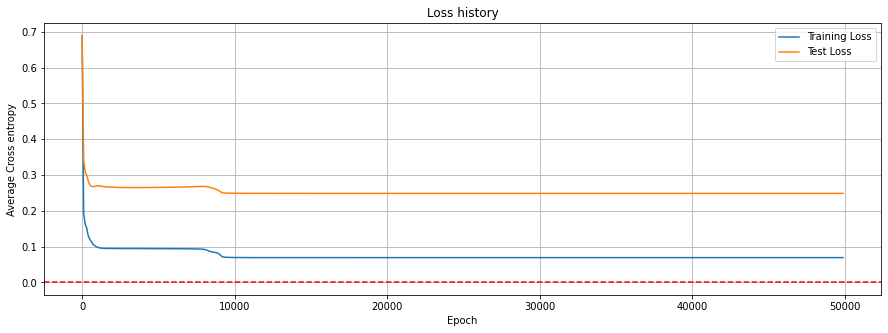

In [5]:
loss, params = qcnn.jax_train(50000, 0.5, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit, X_train, Y_train, X_test, Y_test, plot = True, info = True)

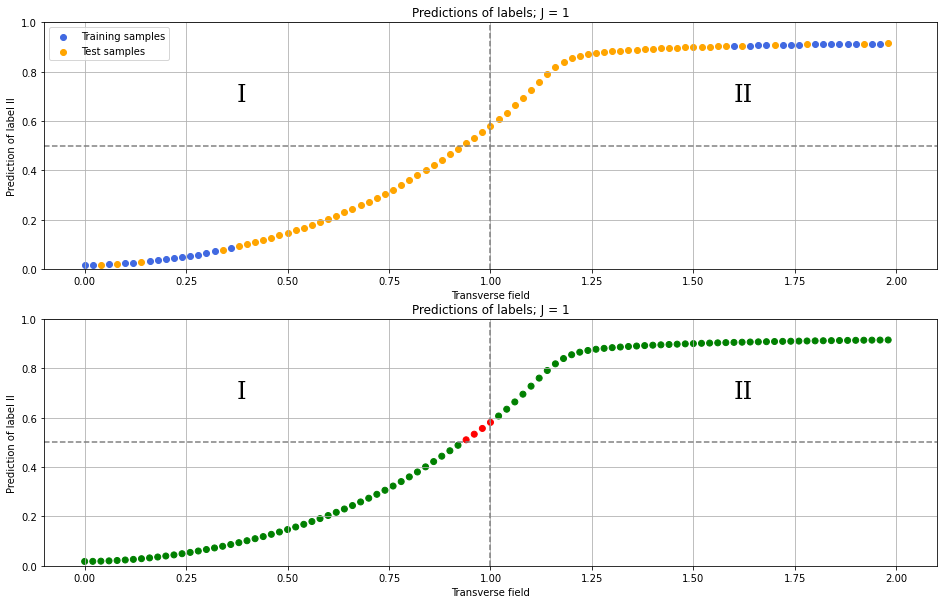

In [6]:
qcnn.jax_plot_results_classification(X, Y, train_index, params, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit)

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 5000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.10467241704463959: 100%|███████████| 5000/5000 [00:24<00:00, 207.51it/s]


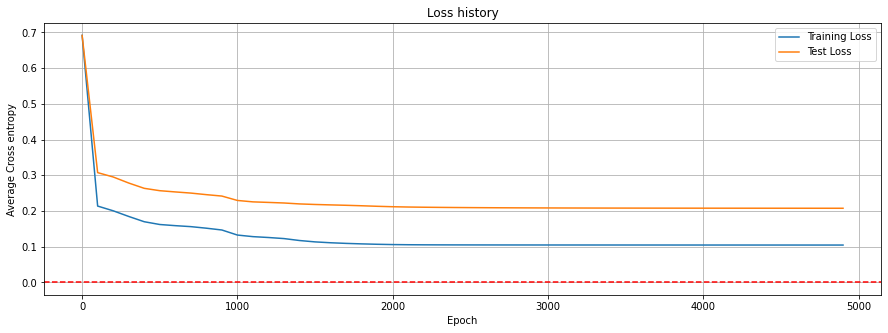

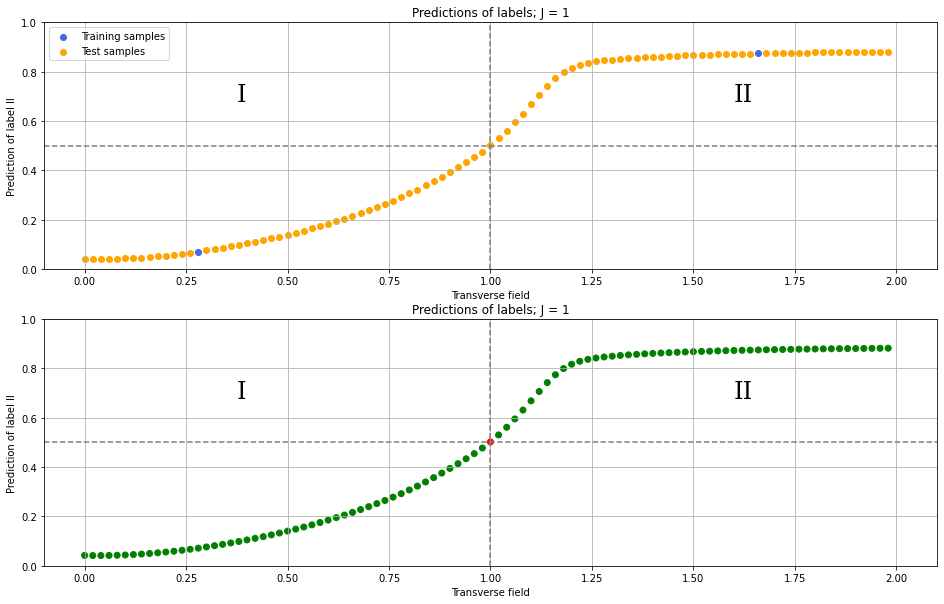

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 5000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.1087365597486496: 100%|████████████| 5000/5000 [00:26<00:00, 192.02it/s]


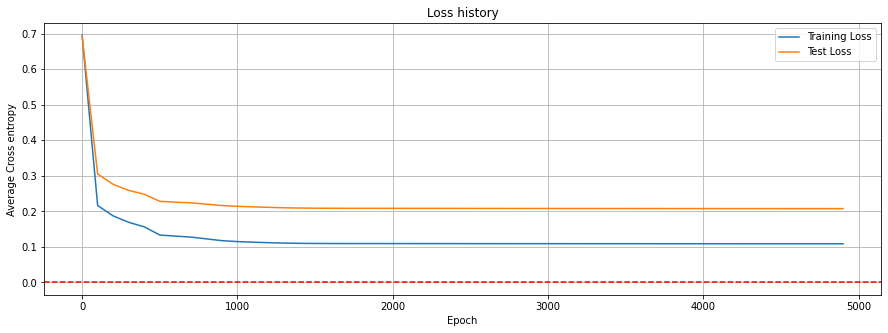

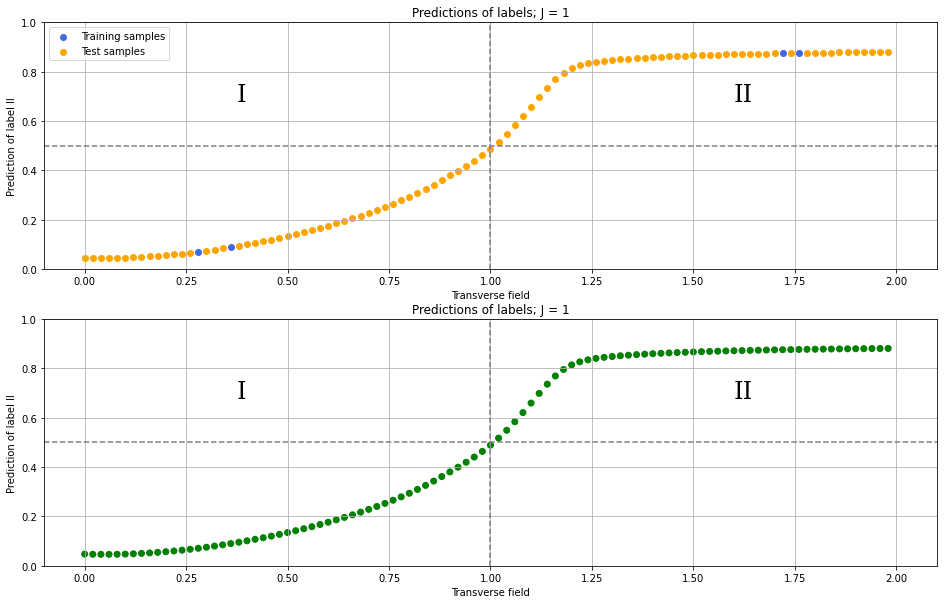

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 5000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.09549704939126968: 100%|███████████| 5000/5000 [00:27<00:00, 182.49it/s]


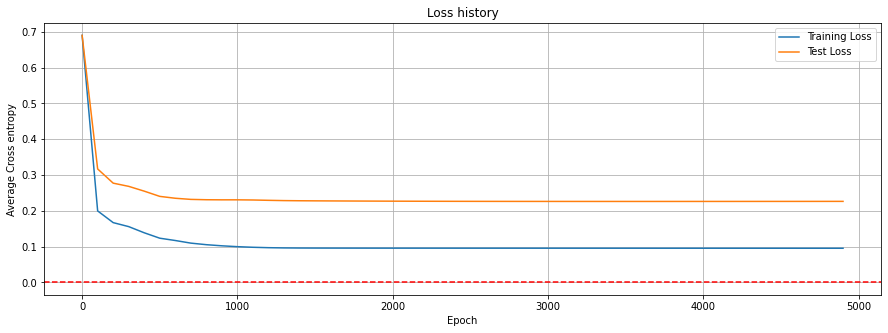

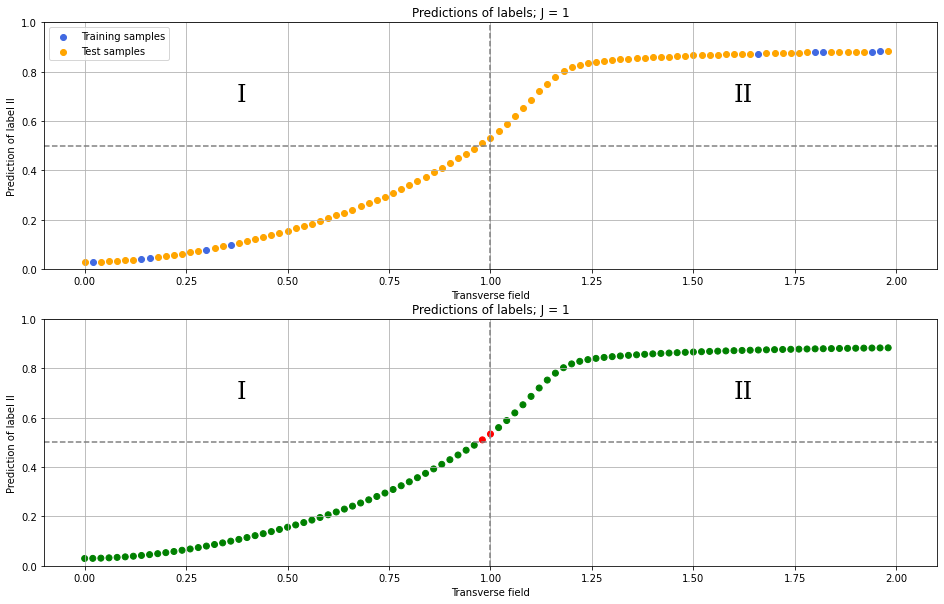

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 5000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.09746700525283813: 100%|███████████| 5000/5000 [00:27<00:00, 185.09it/s]


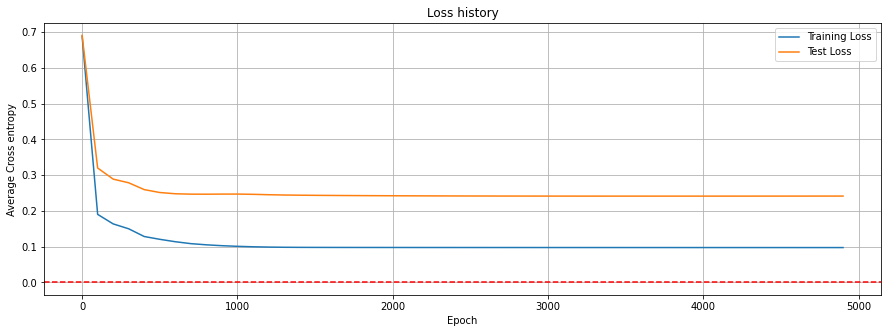

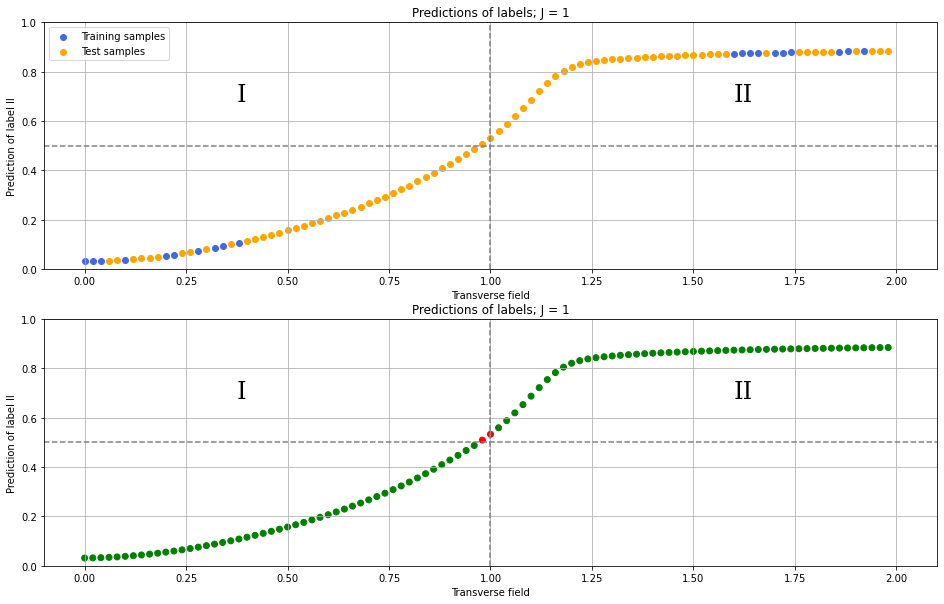

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 5000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.09377916157245636: 100%|███████████| 5000/5000 [00:24<00:00, 202.64it/s]


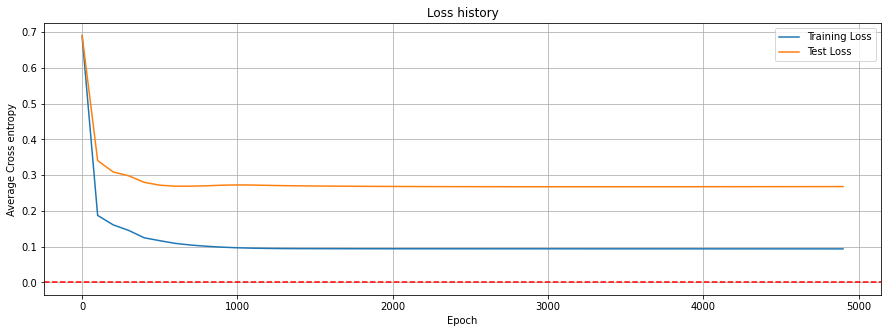

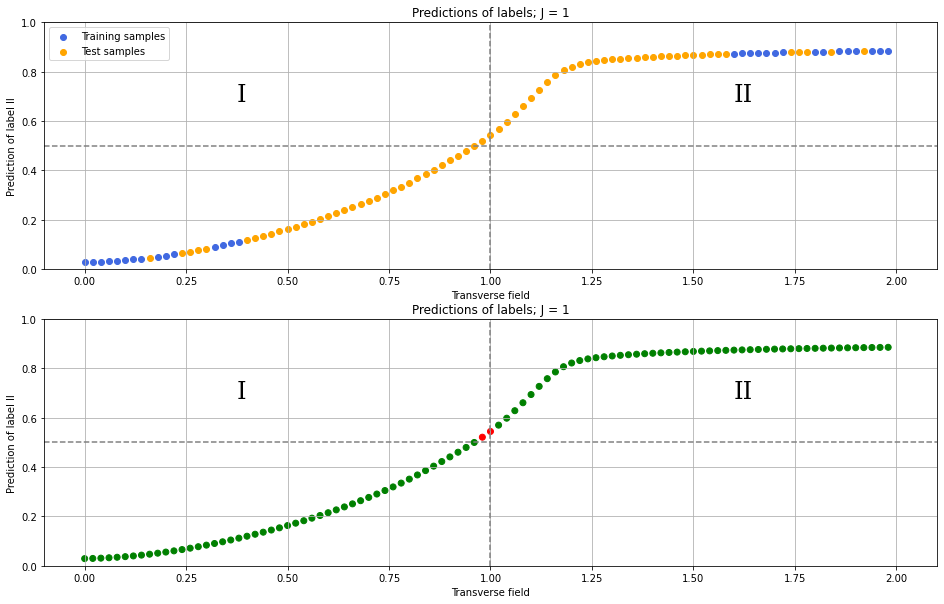

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 5000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.09522781521081924: 100%|███████████| 5000/5000 [00:26<00:00, 188.05it/s]


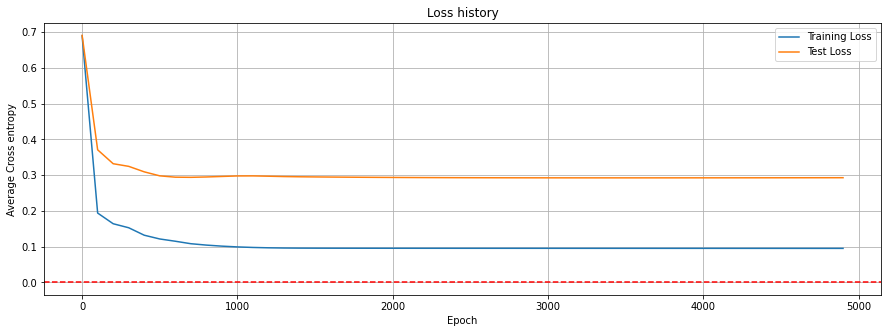

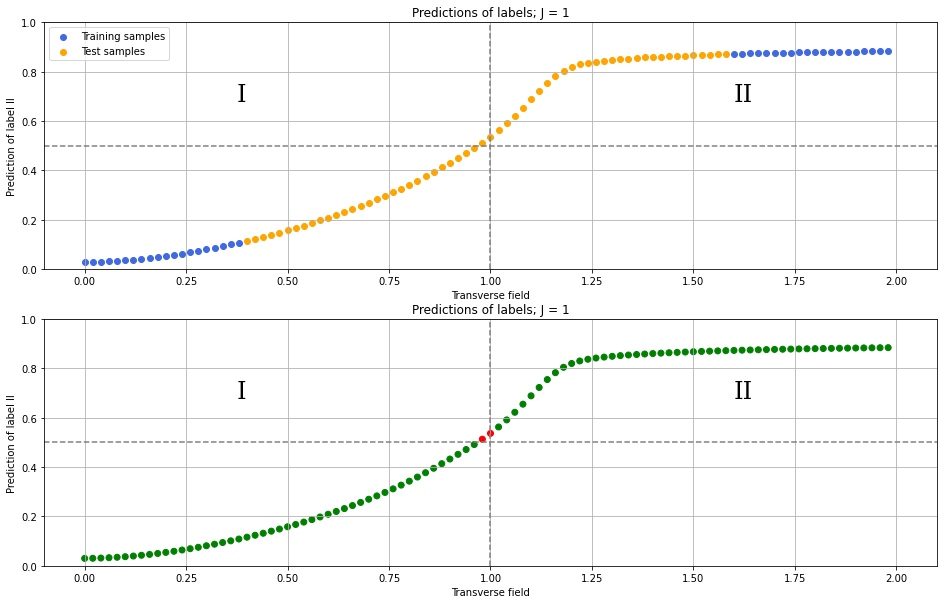

In [8]:
for points in [1, 2, 5, 10, 15, 20]:
    # Load data and separate in training and test set
    data = joblib.load('./vqe_states_job/0noiseN'+str(N)+'.job')
    
    train_index = np.sort(np.concatenate((np.random.choice(np.arange(int(0.2*len(data))), points, replace = False), np.random.choice(np.arange(int(0.8*len(data)),len(data)), points, replace = False)  )))
    
    X_train, Y_train = [], []
    X_test, Y_test   = [], []
    X, Y             = [], []
    for i in range(len(data)): 
        if i in train_index:
            X_train.append(data[i][0])
            Y_train.append(data[i][1])
            X.append(data[i][0])
            Y.append(data[i][1])
        else:
            X_test.append(data[i][0])
            Y_test.append(data[i][1])
            X.append(data[i][0])
            Y.append(data[i][1])
            
    X_train, Y_train = jnp.array(X_train), jnp.array(Y_train)
    X_test, Y_test   = jnp.array(X_test), jnp.array(Y_test)
    X, Y             = jnp.array(X), jnp.array(Y)
    
    loss, params = qcnn.jax_train(5000, 0.5, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit, X_train, Y_train, X_test, Y_test, plot = True, info = True)
    qcnn.jax_plot_results_classification(X, Y, train_index, params, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit)
    
    plt.show()

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 10000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.4541671872138977: 100%|██████████| 10000/10000 [00:35<00:00, 279.13it/s]


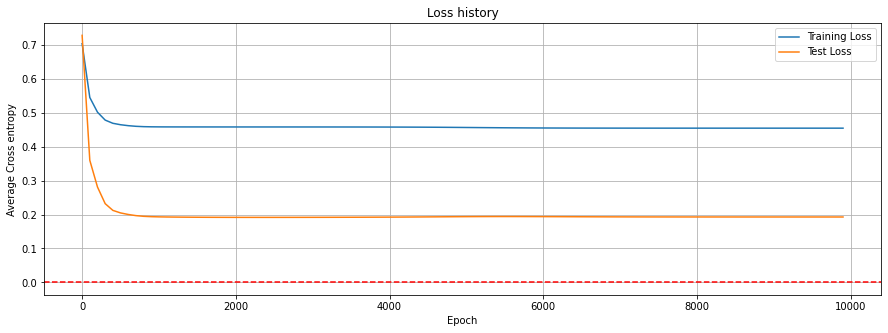

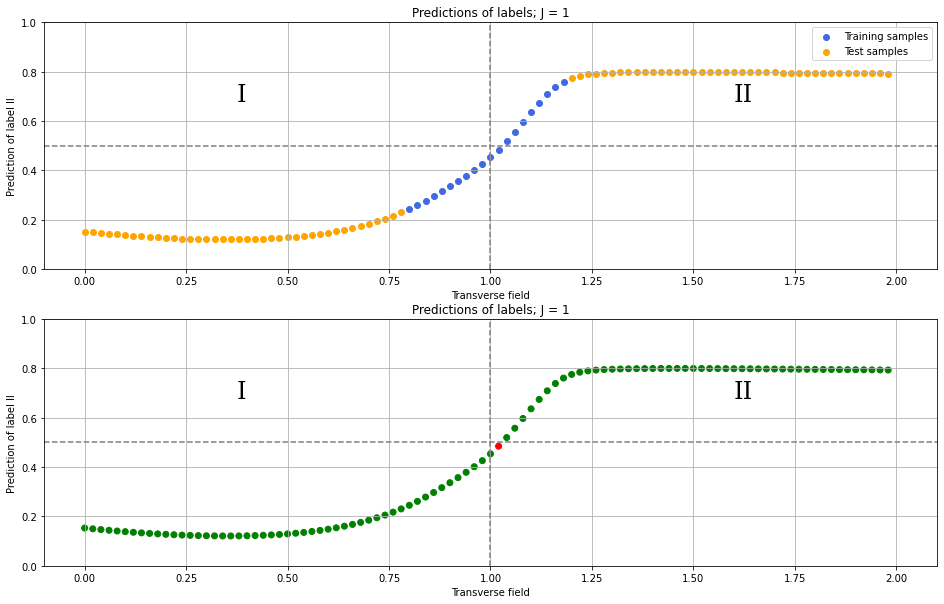

In [14]:
# Load data and separate in training and test set
data = joblib.load('./vqe_states_job/0noiseN'+str(N)+'.job')

train_index = np.sort( np.random.choice(np.arange(int(0.4*len(data)),int(0.6*len(data))), 20, replace = False) )

X_train, Y_train = [], []
X_test, Y_test   = [], []
X, Y             = [], []
for i in range(len(data)): 
    if i in train_index:
        X_train.append(data[i][0])
        Y_train.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])
    else:
        X_test.append(data[i][0])
        Y_test.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])

X_train, Y_train = jnp.array(X_train), jnp.array(Y_train)
X_test, Y_test   = jnp.array(X_test), jnp.array(Y_test)
X, Y             = jnp.array(X), jnp.array(Y)

loss, params = qcnn.jax_train(10000, 0.5, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit, X_train, Y_train, X_test, Y_test, plot = True, info = True)
qcnn.jax_plot_results_classification(X, Y, train_index, params, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit)

plt.show()

+-- PARAMETERS ---+
a factor   = 0.5 ('a' coefficient of the optimizer)
epochs     = 10000 (# epochs for learning)
N          = 8 (Number of spins of the system)


Cost: 0.20797334611415863: 100%|█████████| 10000/10000 [00:38<00:00, 260.79it/s]


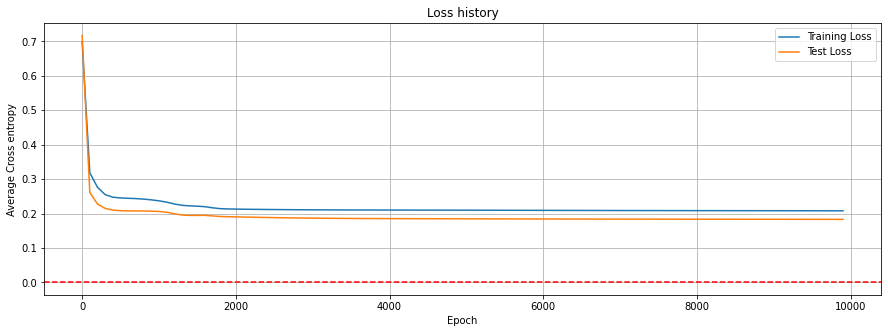

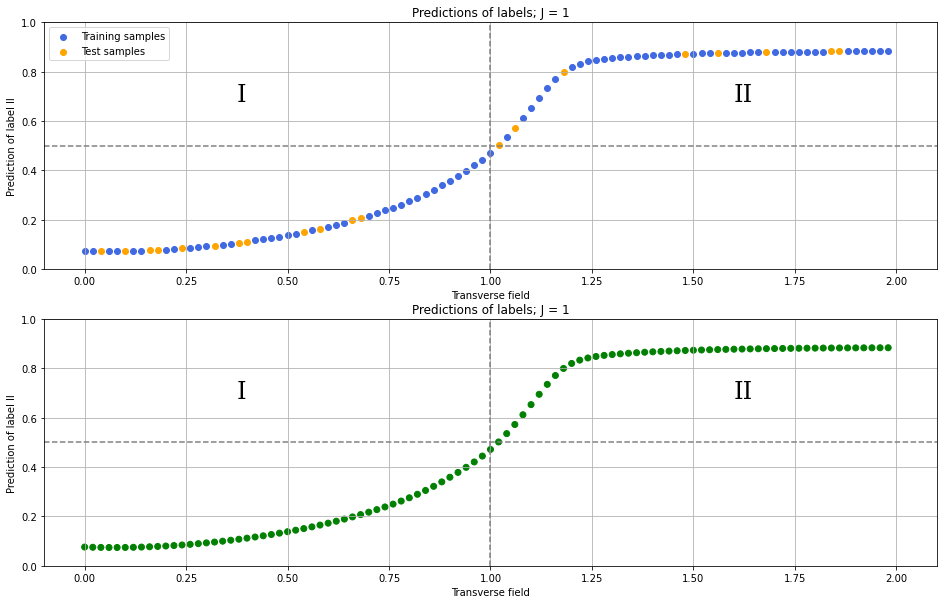

In [10]:
# Load data and separate in training and test set
data = joblib.load('./vqe_states_job/0noiseN'+str(N)+'.job')

train_index = np.sort( np.random.choice(np.arange(len(data)), 80, replace = False) )

X_train, Y_train = [], []
X_test, Y_test   = [], []
X, Y             = [], []
for i in range(len(data)): 
    if i in train_index:
        X_train.append(data[i][0])
        Y_train.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])
    else:
        X_test.append(data[i][0])
        Y_test.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])

X_train, Y_train = jnp.array(X_train), jnp.array(Y_train)
X_test, Y_test   = jnp.array(X_test), jnp.array(Y_test)
X, Y             = jnp.array(X), jnp.array(Y)

loss, params = qcnn.jax_train(10000, 0.5, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit, X_train, Y_train, X_test, Y_test, plot = True, info = True)
qcnn.jax_plot_results_classification(X, Y, train_index, params, N, device, vqe.vqe_circuit, qcnn.qcnn_circuit)

plt.show()